In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the data
df=pd.read_csv(r'./people.csv')

In [4]:
# display top 5 records
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
# check the columns
list(df.columns)

['satisfactoryLevel',
 'lastEvaluation',
 'numberOfProjects',
 'avgMonthlyHours',
 'timeSpent.company',
 'workAccident',
 'left',
 'promotionInLast5years',
 'dept',
 'salary']

In [6]:
# to display the overview of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df['timeSpent.company']

0        3
1        6
2        4
3        3
4        3
        ..
14994    4
14995    2
14996    4
14997    5
14998    3
Name: timeSpent.company, Length: 14999, dtype: int64

In [10]:
df.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994    medium
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [11]:
df.rename(columns = {'timeSpent.company':'timeSpent_company'}, inplace = True)

In [12]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [13]:
# checking the shape of dataset (no of rows & no of cols)
df.shape

(14999, 10)

In [14]:
# checking for duplicate values
df.duplicated().sum()

3008

In [15]:
df=df.drop_duplicates(keep="first")

In [16]:
df.shape

(11991, 10)

In [17]:
# to check the null value
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

Normality Test


Check whether the data is normally distributed or not in satisfactorylevel column using shapiro-wilk test

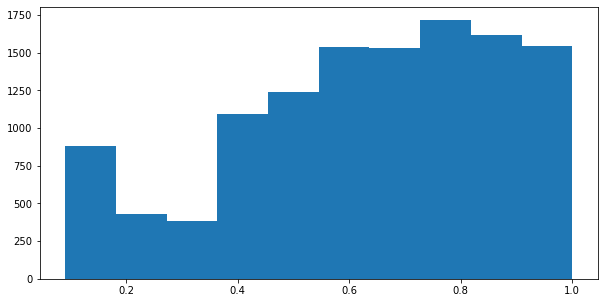

In [18]:
# plotting histogram to visualize the distribution of data
plt.figure(figsize=(10,5))
plt.hist(df["satisfactoryLevel"])
plt.show()

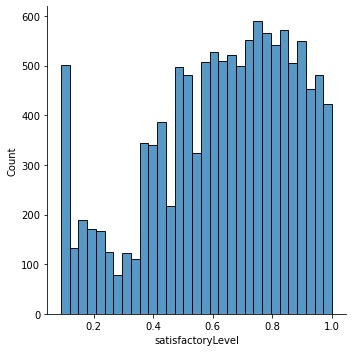

In [19]:
sns.displot(df["satisfactoryLevel"])

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

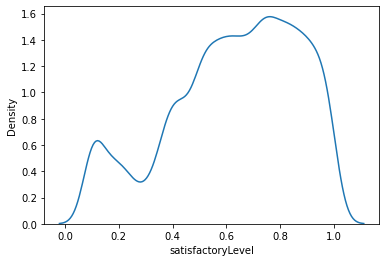

In [20]:
sns.kdeplot(x='satisfactoryLevel', data=df)


In [21]:
# h0 - data is normally distributed
# h1 - data is not normally distributed

In [22]:
from scipy.stats import shapiro

In [23]:
stat,p_value=shapiro(df["satisfactoryLevel"])

c:\Users\JAHANAVI\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
print(p_value)

0.0


In [25]:
print(stat)

0.9526869654655457


In [26]:
# p value is less than 0.05 reject null hypothesis, data is not normally distributed

In [27]:
# salary is categorical data
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [29]:
df1=df

In [30]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [31]:
# Converting the cat data into num, using Label Encoder 
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df1["salary"]=l1.fit_transform(df1["salary"])  
 # fit()-> input the data
 # transform()->to apply the changes   
 # fit_transform()-> data will be inputted and necessary canges will be updated onto the object


C:\Users\JAHANAVI\AppData\Local\Temp\ipykernel_18160\3165276589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["salary"]=l1.fit_transform(df1["salary"])


In [32]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [33]:
df1['salary'].unique()

array([1, 2, 0])

In [34]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [35]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


Correlation Graph

<AxesSubplot:>

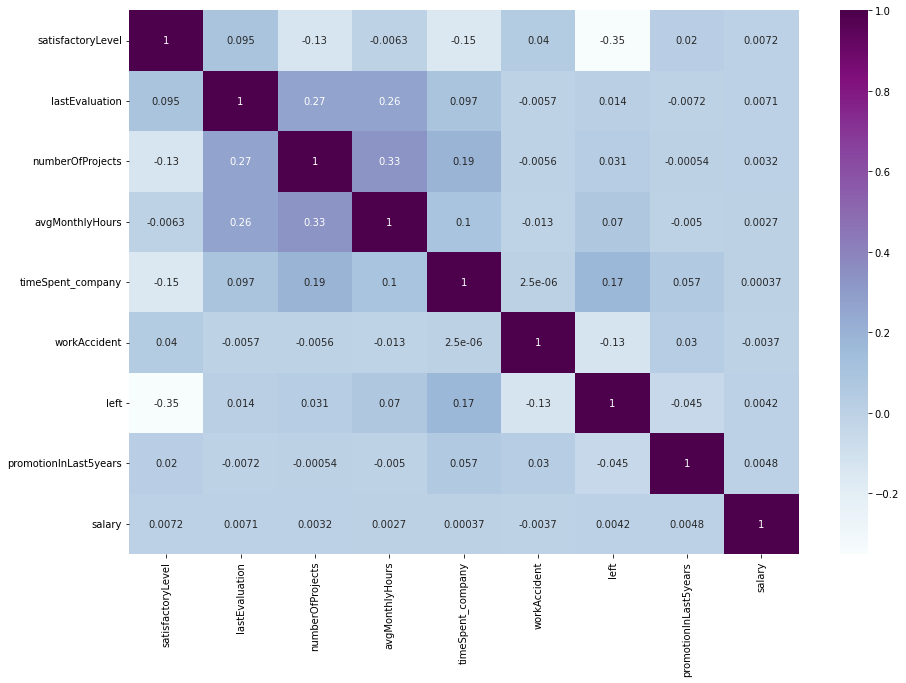

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="BuPu")

In [37]:
# Descriptive statistics
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [38]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [39]:
df.shape

(11991, 10)

In [40]:
# Random experiment
emp=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [41]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,support,1
379,0.48,0.78,2,198,2,0,1,0,technical,2
413,0.34,0.67,4,141,2,0,1,0,sales,1
1239,0.14,0.47,4,175,2,0,1,0,RandD,2
1426,0.19,0.58,5,182,2,0,0,0,technical,2


In [42]:
emp["left"].value_counts()

0    211
1      6
Name: left, dtype: int64

In [43]:
emp['salary'].value_counts()

1    114
2     89
0     14
Name: salary, dtype: int64

In [44]:
emp.shape

(217, 10)

In [45]:
emp.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
satisfactoryLevel,1.000000,0.021638,-0.217151,0.024962,NaN,0.025751,-0.215200,0.047443,0.030787
lastEvaluation,0.021638,1.000000,0.094969,0.001310,NaN,-0.002001,0.122231,-0.089724,0.007181
numberOfProjects,-0.217151,0.094969,1.000000,-0.047254,NaN,-0.064793,0.115917,-0.020698,-0.153083
avgMonthlyHours,0.024962,0.001310,-0.047254,1.000000,NaN,-0.053849,-0.043436,0.043453,-0.002823
timeSpent_company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workAccident,0.025751,-0.002001,-0.064793,-0.053849,NaN,1.000000,-0.072686,0.018301,0.069108
left,-0.215200,0.122231,0.115917,-0.043436,NaN,-0.072686,1.000000,-0.025897,-0.003477
promotionInLast5years,0.047443,-0.089724,-0.020698,0.043453,NaN,0.018301,-0.025897,1.000000,0.065548
salary,0.030787,0.007181,-0.153083,-0.002823,NaN,0.069108,-0.003477,0.065548,1.000000


In [46]:
emp["avgMonthlyHours"].mean()

167.2258064516129

T-test

In [47]:
# t-test
# It is used to determine if there is a significant difference between the means of two groups 

One sample t-test

In [48]:
# One sample t-test - It tells us whether the means of the sample and the population are different or not

The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

Condition - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200


In [49]:
employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [50]:
employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
7,0.42,0.53,2,142,3,0,1,0,sales,1
8,0.45,0.54,2,135,3,0,1,0,sales,1


In [51]:
employee.shape

(1462, 10)

In [52]:
# null hypothesis - avg monthly hours of a employee having 2 yrs exp and the employee more than that is same i.e, 167 hrs 
# alternate hypothesis - avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee


In [53]:
# selecting a random sample
sample_size= 100
sample1= employee.sample(sample_size,random_state=0)

In [54]:
sample1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1685,0.17,0.76,4,171,5,0,0,0,product_mng,1
11633,0.46,0.46,2,145,3,0,1,0,IT,0
1250,0.45,0.53,2,159,3,0,1,0,sales,1
774,0.45,0.49,2,144,3,0,1,0,accounting,1
3506,0.50,0.38,5,175,4,0,0,0,technical,0
...,...,...,...,...,...,...,...,...,...,...
27,0.38,0.46,2,137,3,0,1,0,technical,1
6314,0.37,0.72,2,163,3,0,0,0,sales,1
2083,0.45,0.39,2,167,3,0,0,0,support,2
5162,0.12,0.39,5,161,4,0,0,0,IT,1


In [55]:
# population mean
pos_mean=167

In [56]:
# sample mean
print(sample1["avgMonthlyHours"].mean())

154.2


In [57]:
from scipy.stats import ttest_1samp

In [58]:
statistics,pvalue=ttest_1samp(sample1["avgMonthlyHours"],pos_mean)
print(statistics,pvalue)

-6.812850056008294 7.534573793907689e-10


In [59]:
# Degrees of freedom
n=len(employee["avgMonthlyHours"])
dof=n-1
print(n,dof)

1462 1461


In [60]:
#df=99

In [61]:
alpha=0.05

In [62]:
from scipy.stats import t

In [63]:
cv=t.ppf([alpha/2,1-alpha/2],dof)
print(cv)

[-1.96158904  1.96158904]


In [64]:
# p value is less than 0.05
#reject null hypothesis,avg monthly hours is not 167 hours for employees having more than 2 yrs of exp

In [65]:
# one sample z test for proportion

The percentage of employee leaving the company 
is 3% having experience of 2 years. Is it
 same for employees having more than 2
years experience?

In [66]:
# Null hypothesis - percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs
# Alternate hypothesis - percentage of employee leaving the company having the exp of 2 years is different from the employee having exp more than 2 yrs

In [67]:
from statsmodels.stats.proportion import proportions_ztest

In [68]:
sample_size=100

In [69]:
sample1=employee.sample(sample_size,random_state=0)

In [70]:
count=sample1["left"].value_counts()

In [71]:
count

1    63
0    37
Name: left, dtype: int64

In [72]:
nobs=len(sample1["left"])

In [73]:
nobs

100

In [74]:
p0=0.3

In [75]:
sample1["left"].value_counts()/nobs

1    0.63
0    0.37
Name: left, dtype: float64

In [76]:
statistic_oneprop,pvalue_oneprop=proportions_ztest(count=count,nobs=nobs,value=p0,alternative="two-sided",prop_var=False)

In [77]:
print(statistic_oneprop,pvalue_oneprop)

-0.5656854249492378 0.5716076449533316


In [78]:
# p value is greater than 0.05 accept null hypothesis and reject alternate hypothesis 
# percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs

In [79]:
from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

[-1.95996398  1.95996398]


Two sample t-test

In [80]:
# Two sample test for means - compared the means of a two independent groups

In [81]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [82]:
df1["timeSpent_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs ?

In [83]:
# checking the variance of both

In [84]:
e1=df1[(df1.timeSpent_company>=2) & (df1.timeSpent_company<=5)]
e2=df1[(df1.timeSpent_company>=6) & (df1.timeSpent_company<=10)]

In [85]:
e1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
5,0.10,0.77,6,247,4,0,1,0,sales,1


In [86]:
e1.shape

(11167, 10)

In [87]:
e2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,2
13,0.78,0.99,4,255,6,0,1,0,sales,1
26,0.84,0.87,4,246,6,0,1,0,hr,1
33,0.57,0.70,3,273,6,0,1,0,support,1
63,0.90,1.00,5,221,6,0,1,0,sales,2


In [88]:
e2.shape

(824, 10)

In [89]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [90]:
 import scipy

In [91]:
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

In [92]:
# p value > 0.05 Hence accept null hypothesis
# The mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs


 F-statistics
 

Compute the f-statistics of the previous problem statement

In [93]:
# F-test for variance is used to test if the variances of two populations are equal.

In [94]:
# Sample Variance 
print(s1.avgMonthlyHours.var())
print(s2.avgMonthlyHours.var())

2324.24620603015
2680.904522613066


In [95]:
# Sample mean
print(s1.avgMonthlyHours.mean())
print(s2.avgMonthlyHours.mean())

203.005
203.3


In [96]:
# Degrees of freedom for sample
df1=len(s1)-1
df2=len(s2)-1

In [97]:
# Computing f statistic
from scipy.stats import f
F=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(F)


0.8669634395501401


In [98]:
import scipy.stats

In [99]:
scipy.stats.f.cdf(F, df1, df2)

0.15739115729495057

In [100]:
f.ppf([alpha/2,1-alpha/2],df1, df2)

array([0.75678659, 1.32137648])

In [101]:
# p value is >0.05, accept null hypothesis, equal variances